In [1]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})
    
%matplotlib inline

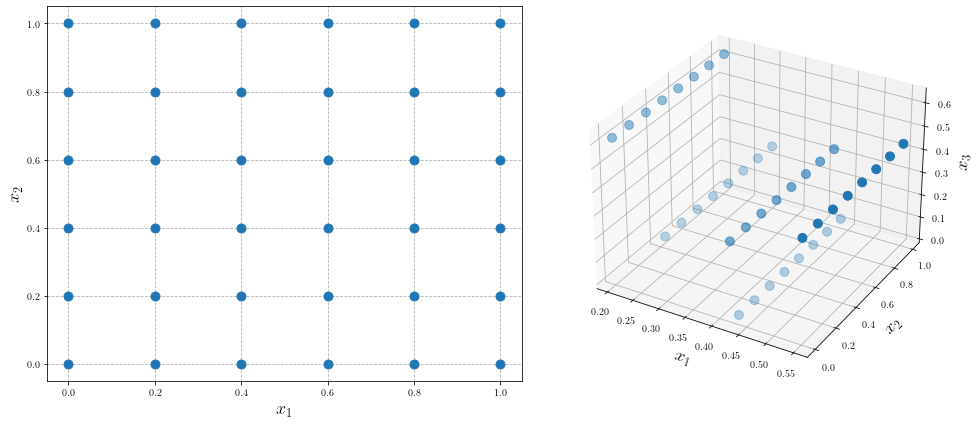

In [4]:
np.random.seed(2)
x1 = np.random.rand(5, 2)
x2 = np.linspace(0, 1, 8).reshape(-1, 1)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(122, projection='3d')
for x in x2:
    ax.scatter(x1[:, 0], x * np.ones(len(x1)), x1[:, 1],
               s=80, facecolor='C0', edgecolor='C0')
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
ax.set_zlabel(r'$x_3$', fontsize=18)


xy = np.meshgrid(np.linspace(0, 1, 6), np.linspace(0, 1, 6))


ax = fig.add_subplot(121)
ax.grid(linestyle='dashed')
ax.set_axisbelow(True)
ax.scatter(xy[0], xy[1], s=80)
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)


fig.tight_layout()
fig.savefig('multigrid.pdf')

plt.show()

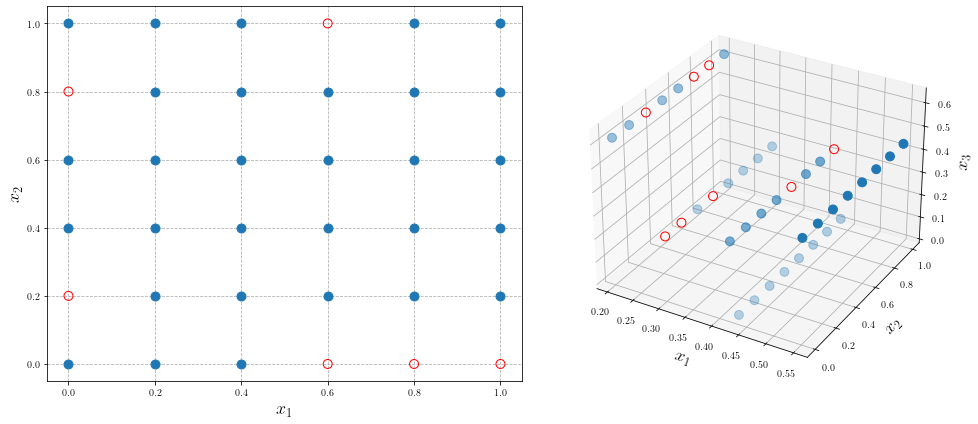

In [5]:
np.random.seed(2)
x1 = np.random.rand(5, 2)
x2 = np.linspace(0, 1, 8).reshape(-1, 1)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(122, projection='3d')

for x in x2:
    missing_idx = np.random.randint(len(x1))
    non_missing = np.setdiff1d(range(len(x1)), [missing_idx])
    ax.scatter(x1[non_missing, 0], x * np.ones(len(non_missing)), x1[non_missing, 1],
               s=80, facecolor='C0', edgecolor='C0')
    ax.scatter(x1[missing_idx, 0], x * np.ones(1), x1[missing_idx, 1],
               s=80, facecolor='none', edgecolor='r')

ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
ax.set_zlabel(r'$x_3$', fontsize=18)


indices = np.meshgrid(np.arange(6), np.arange(6))
indices = np.hstack((indices[0].reshape(-1, 1),
                     indices[1].reshape(-1, 1)))

missing_idx = np.random.choice(range(len(indices)), size=6)
non_missing_idx = np.setdiff1d(range(len(indices)), missing_idx)

xy = np.meshgrid(np.linspace(0, 1, 6), np.linspace(0, 1, 6))
xy = np.hstack((xy[0].reshape(-1, 1), xy[1].reshape(-1, 1)))

ax = fig.add_subplot(121)
ax.scatter(xy[non_missing_idx, 0], xy[non_missing_idx, 1], s=80)
ax.scatter(xy[missing_idx, 0], xy[missing_idx, 1], s=80,
          facecolor='none', edgecolor='r')
ax.grid(linestyle='dashed')
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
ax.set_axisbelow(True)


fig.tight_layout()
fig.savefig('multigrid_incomplete.pdf')

plt.show()

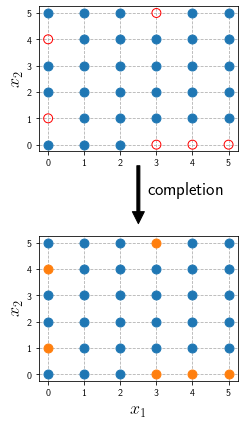

In [89]:
fig = plt.figure(figsize=(3.5, 6))

ax = fig.add_subplot(211)
ax.scatter(xy[non_missing_idx, 0], xy[non_missing_idx, 1], s=80)
ax.scatter(xy[missing_idx, 0], xy[missing_idx, 1], s=80,
          facecolor='none', edgecolor='r')
ax.grid(linestyle='dashed')
# ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
ax.set_xticks(np.linspace(0, 1, 6))
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_xticklabels(np.arange(6))
ax.set_yticklabels(np.arange(6))
ax.set_axisbelow(True)

ax.annotate('', xy=(0.5, -0.5), xycoords='axes fraction', xytext=(0.5, -0.1),
            fontsize=18,
            arrowprops=dict(#arrowstyle="->",
                            color='k',
                            width=3))
ax.annotate('completion', xy=(0.55, -0.3), xycoords='axes fraction', xytext=(0.55, -0.3),
            fontsize=18)

ax = fig.add_subplot(212)
ax.scatter(xy[non_missing_idx, 0], xy[non_missing_idx, 1], s=80)
ax.scatter(xy[missing_idx, 0], xy[missing_idx, 1], s=80,
          facecolor='C1', edgecolor='C1')
ax.grid(linestyle='dashed')
ax.set_xlabel(r'$x_1$', fontsize=18)
ax.set_ylabel(r'$x_2$', fontsize=18)
ax.set_xticks(np.linspace(0, 1, 6))
ax.set_yticks(np.linspace(0, 1, 6))

ax.set_xticklabels(np.arange(6))
ax.set_yticklabels(np.arange(6))
ax.set_axisbelow(True)

fig.tight_layout()
fig.savefig('tensor_completion.pdf')